In [1]:
import numpy as np
import pandas as pd
from pgmpy.estimators import ParameterEstimator, BicScore
from pgmpy.models import BayesianNetwork
import networkx as nx
import matplotlib.pyplot as plt
import GA_lib as GA


In [2]:
data=pd.read_csv("ASIA_DATA.csv")
dag_true=pd.read_csv("DAGtrue_ASIA.csv")

In [3]:
dag_true
data.columns

Index(['asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp'], dtype='object')

In [4]:


# Read the CSV file into a DataFrame
df = dag_true
# Define the desired topological order
topological_order = ['asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp']

# Create a list of unique variables (nodes)
nodes = np.unique(df[['Variable 1', 'Variable 2']].values)

# Initialize an empty adjacency matrix filled with zeros
num_nodes = len(nodes)
adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=int)

# Iterate through the DataFrame and update the adjacency matrix based on dependencies
for _, row in df.iterrows():
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    dependency = row['Dependency']

    # Find the indices of var1 and var2 in the topological order list
    index1 = topological_order.index(var1)
    index2 = topological_order.index(var2)

    # Set the corresponding entry in the adjacency matrix to 1
    if dependency == '->':
        adjacency_matrix[index1, index2] = 1

print("Adjacency Matrix (in topological order):")
print(adjacency_matrix)

Adjacency Matrix (in topological order):
[[0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [5]:
obs=5000
data_sampled=data.sample(obs)

In [6]:
data_sampled=data_sampled.astype('category')
data_sampled

,asia,tub,smoke,lung,bronc,either,xray,dysp
75955,no,no,yes,no,no,no,yes,no
62822,no,no,no,no,no,no,no,no
79508,no,no,yes,yes,yes,yes,yes,yes
71304,no,no,yes,no,yes,no,no,yes
35936,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...
34370,no,no,no,no,no,no,no,no
38728,no,no,yes,no,yes,no,no,yes
9228,no,no,yes,no,yes,no,no,yes
11679,no,no,no,no,no,no,no,no


In [7]:
node_names = np.array(data.columns)
model = BayesianNetwork()
model.add_nodes_from(node_names)
for i in range(len(node_names)):
    for j in range(len(node_names)):
        if adjacency_matrix[i][j] == 1:
            model.add_edge(node_names[i], node_names[j])

In [8]:
pe = ParameterEstimator(model, data)


In [9]:
bic = BicScore(data_sampled)

bic_score=bic.score(model)

print("BIC Score:", bic_score)

BIC Score: -11258.142894420707


In [10]:
adjacency_matrix

array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [11]:
data_sampled

,asia,tub,smoke,lung,bronc,either,xray,dysp
75955,no,no,yes,no,no,no,yes,no
62822,no,no,no,no,no,no,no,no
79508,no,no,yes,yes,yes,yes,yes,yes
71304,no,no,yes,no,yes,no,no,yes
35936,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...
34370,no,no,no,no,no,no,no,no
38728,no,no,yes,no,yes,no,no,yes
9228,no,no,yes,no,yes,no,no,yes
11679,no,no,no,no,no,no,no,no


In [12]:
node=1
states=GA.state_count(data_sampled,adjacency_matrix,node,node_names)
states

,asia,tub,Count
0,no,no,4891
1,no,yes,58
2,yes,no,50
3,yes,yes,1


In [13]:
GA.BIC_score(data_sampled,adjacency_matrix,node_names)

-11258.142894420705

In [14]:
flag=True

while(flag):
# Specify the size of the square matrix
    n = 8  # Adjust the value of 'n' as needed
# Generate a random upper triangular matrix
    upper_triangular_matrix = np.triu(np.random.randint(0,2, size=(n, n)),1)
    upper_triangular_matrix[5][1]=1
    #upper_triangular_matrix[6][0]=1
    flag,G=GA.is_dag(upper_triangular_matrix)
    print(flag)
    if(flag):
        flag=False
        
    else:
        flag=True
        print(flag)
    #flag=GA.is_dag(upper_triangular_matrix)

print(flag)


False
True
False
True
False
True
False
True
False
True
False
True
False
True
True
False


In [15]:
upper_triangular_matrix = np.random.randint(0,2, size=(n, n))

upper_triangular_matrix

array([[1, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 1, 1],
       [1, 0, 1, 1, 0, 0, 0, 1]])

In [16]:
GA.is_dag(upper_triangular_matrix)

(False, <networkx.classes.digraph.DiGraph at 0x252c485f250>)

In [17]:
print(upper_triangular_matrix)

[[1 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 0]
 [0 0 0 1 0 1 1 0]
 [0 0 1 1 0 1 1 1]
 [0 0 0 1 1 1 0 0]
 [1 0 0 0 1 1 0 1]
 [0 1 0 0 1 0 1 1]
 [1 0 1 1 0 0 0 1]]


In [18]:
bit_representation=GA.dag_to_bit(upper_triangular_matrix)
bit_representation

array([ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1., -1., -1.,  1.,  1.,  0.,  0., -1.,  0.,  0.,
        1.,  1.])

In [19]:
mask=np.triu(np.ones([n,n]), k=1)
rows, cols = np.where(mask)
index = np.array([rows, cols]).T


In [20]:
dag2=GA.bit_to_dag(bit_representation,index)

In [21]:
dag2

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 0]])

In [22]:
dag2

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 0]])

In [23]:
#GA.BIC_score(data_sampled,upper_triangular_matrix,node_names)

In [24]:
GA.BIC_score(data_sampled,adjacency_matrix,node_names)

-11258.142894420705

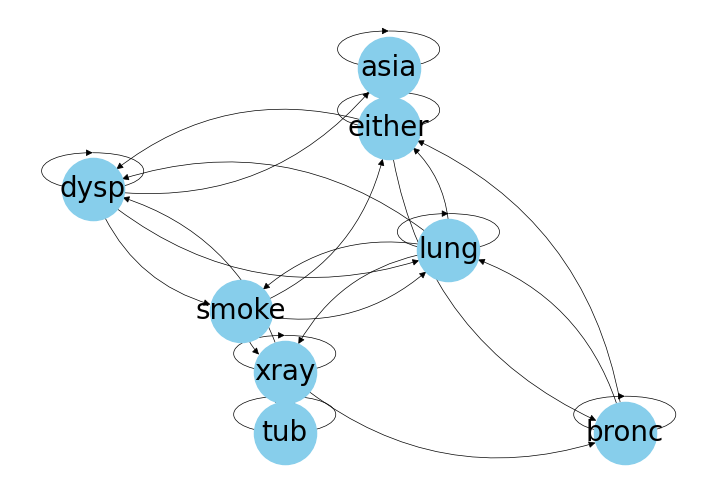

In [25]:
GA.plot_digraph(upper_triangular_matrix,np.array(data.columns))

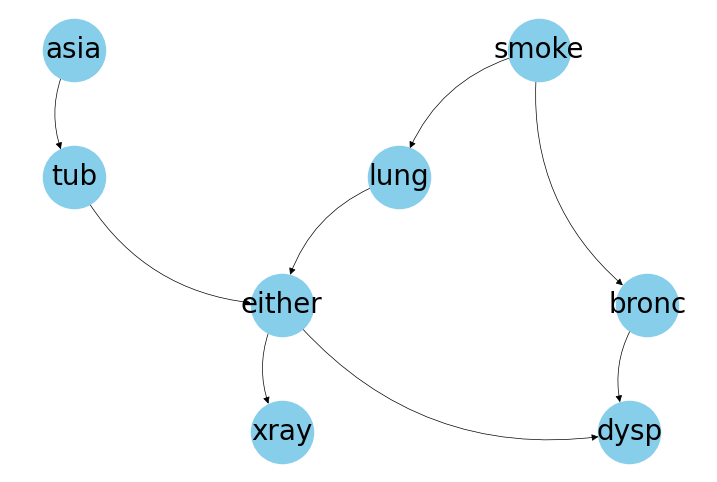

In [26]:
GA.plot_digraph(adjacency_matrix,np.array(data.columns))

In [27]:
upper_triangular_matrix[1][5]=1
upper_triangular_matrix[5][7]=1


In [28]:
#bayesian_network_individual.pandas_dataframe.columns

In [29]:
upper_triangular_matrix

array([[1, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 1, 1],
       [1, 0, 1, 1, 0, 0, 0, 1]])

In [30]:



bayesian_network_individual = GA.BayesianNetworkIndividual(upper_triangular_matrix, data_sampled)




c:\Users\fredp\OneDrive\Documentos\Mestrado\GA_PYTHON_MATLAB\GA_lib.py:212: UserWarning: The adjacency matrix is not a DAG. The Bayesian network may not be valid.
  warnings.warn("The adjacency matrix is not a DAG. The Bayesian network may not be valid.")


In [31]:

#upper_triangular_matrix=np.zeros([8,8])
#upper_triangular_matrix

In [32]:
#bayesian_network_individual.evaluate_cost()

In [33]:
bayesian_network_individual.adjacency_matrix

array([[1, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 1, 1],
       [1, 0, 1, 1, 0, 0, 0, 1]])

In [34]:
bayesian_network_individual.bit_representation


array([ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  1., -1., -1.,  1.,  1.,  0.,  0., -1.,  0.,  0.,
        1.,  1.])

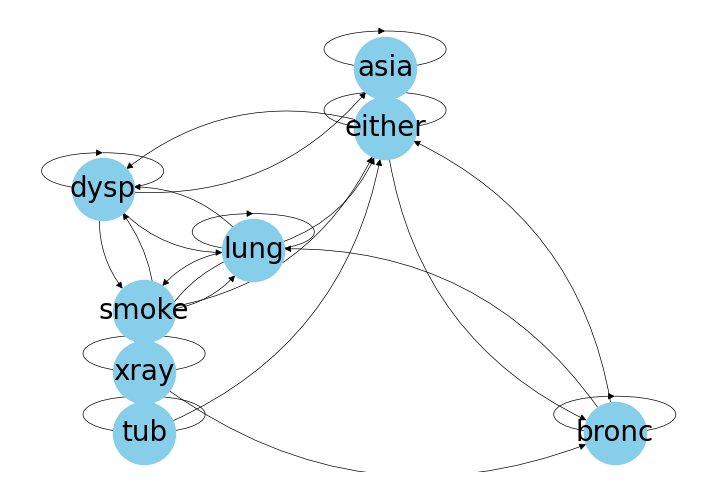

In [35]:
GA.plot_digraph(bayesian_network_individual.adjacency_matrix,np.array(data.columns))

In [36]:
teste=np.array(data.columns)

teste[5]

'either'

In [37]:

edges = [(0, 0), (0, 1), (0, 2), (1, 2), (2, 0), (2, 1), (2, 2) ,(3,1),(3,0),(2,3)]
G = nx.DiGraph(edges)
test=(list(nx.simple_cycles(G)))

for edd in (list(nx.simple_cycles(G))):
    print(edd)



[0]
[2]
[0, 1, 2]
[0, 1, 2, 3]
[0, 2]
[0, 2, 3]
[1, 2]
[1, 2, 3]


In [38]:

test1=test[4]
print(test1[0],test1[1])


0 2


In [39]:
len_cycles=len(sorted(nx.simple_cycles(G)))
cycles=list(nx.simple_cycles(G))
k = np.random.randint(0, (len_cycles)) 
cycle = cycles[k]
len_cycle=cycle
print(len_cycle)
if len(len_cycle)<2:
    #G.remove_edge(cycle[0],cycle[0])
    print((cycle[0],cycle[0]))
    print('<2')
else:
    if len(len_cycle)==2:
        #G.remove_edge(cycle[0],cycle[1])
        print('=2')
        print(cycle[0],cycle[1])
        
    else:
        
        k = np.random.randint(0, len(len_cycle))
        #G.remove_edge(cycle[k],cycle[1])
        j=k
        while j == k:
            j = np.random.randint(0, len(len_cycle))
        print('>2')
        print(cycle[j],cycle[k])
        



[0, 2, 3]
>2
2 0


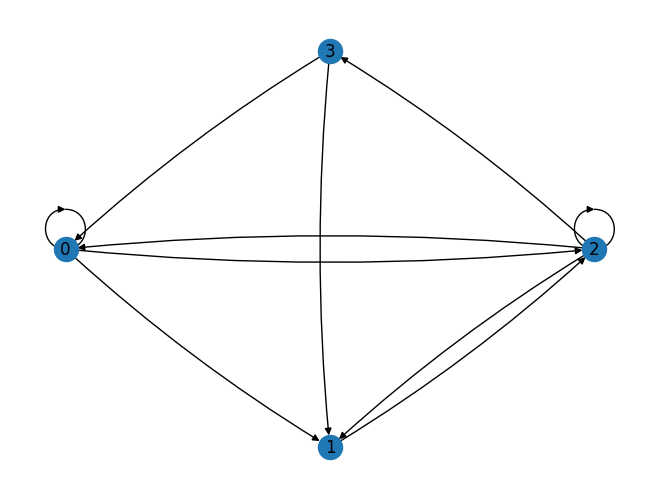

In [40]:
nx.draw(G,with_labels=True, pos=nx.shell_layout(G),connectionstyle='arc3,rad=0.05')

In [41]:
G.edges

OutEdgeView([(0, 0), (0, 1), (0, 2), (1, 2), (2, 0), (2, 1), (2, 2), (2, 3), (3, 1), (3, 0)])

In [42]:


# Create a sample matrix (Matrix A)
A = np.array([[2, 3, 4],
              [5, 6, 7],
              [8, 9, 10]])
B = np.ones_like(A) - np.eye(A.shape[0])

B

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

In [43]:

upper_triangular_matrix=GA.repair_dag(bayesian_network_individual).toarray()



bayesian_network_individual = GA.BayesianNetworkIndividual(upper_triangular_matrix, data_sampled)



[2, 6, 7, 3]
>2
6 7
[1, 5, 4, 3, 7, 2, 6]
>2
7 2
[1, 5, 7, 3, 6]
>2
5 7
[3, 7]
=2
3 7
[2, 5, 4, 3]
>2
4 3
[4, 5]
=2
4 5
[7]
<2
(7, 7)
[3]
<2
(3, 3)
[0]
<2
(0, 0)
[1]
<2
(1, 1)
[2, 3]
=2
2 3
[6]
<2
(6, 6)
[1, 6]
=2
1 6
[5]
<2
(5, 5)
[4]
<2
(4, 4)
[0, 5]
=2
0 5


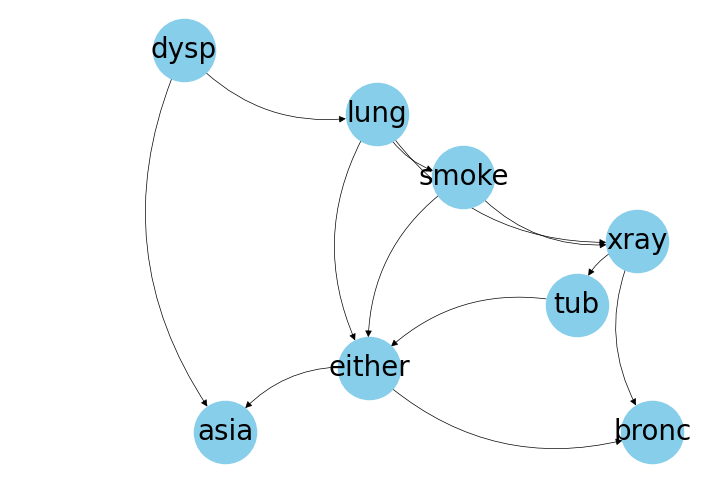

In [44]:
GA.plot_digraph(bayesian_network_individual.adjacency_matrix,np.array(data.columns))